##Time Series Arima Model in R

### install.packages("tseries")

In [1]:
library(tseries)
library(forecast)

mydata<- read.csv("/Users/vlasis/Box Sync/Programming/R/Econometric Academy/Arima r/timeseries_ppi.csv")
str(mydata)
summary(mydata)
attach(mydata)

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 6.2 

Warning message:
In file(file, "rt"): cannot open file '/Users/vlasis/Box Sync/Programming/R/Econometric Academy/Arima r/timeseries_ppi.csv': No such file or directory

ERROR: Error in file(file, "rt"): cannot open the connection


ERROR: Error in str(mydata): object 'mydata' not found


ERROR: Error in summary(mydata): object 'mydata' not found


ERROR: Error in attach(mydata): object 'mydata' not found


## Defining variables

In [5]:
Y <- ppi
d.Y <- diff(Y)
t <- yearqrt
levels(Y)

NULL

##Descriptive statistics and plots

Original variable does not seem stationary <br>
Differnced variable looks stationary although the variance increases

In [6]:
# Descriptive statistics and plotting the data
summary(Y)
summary(d.Y)




   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  25.24   29.66   77.00   64.68   93.27  110.40 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-3.2100  0.0300  0.3000  0.4643  0.9625  3.0800 

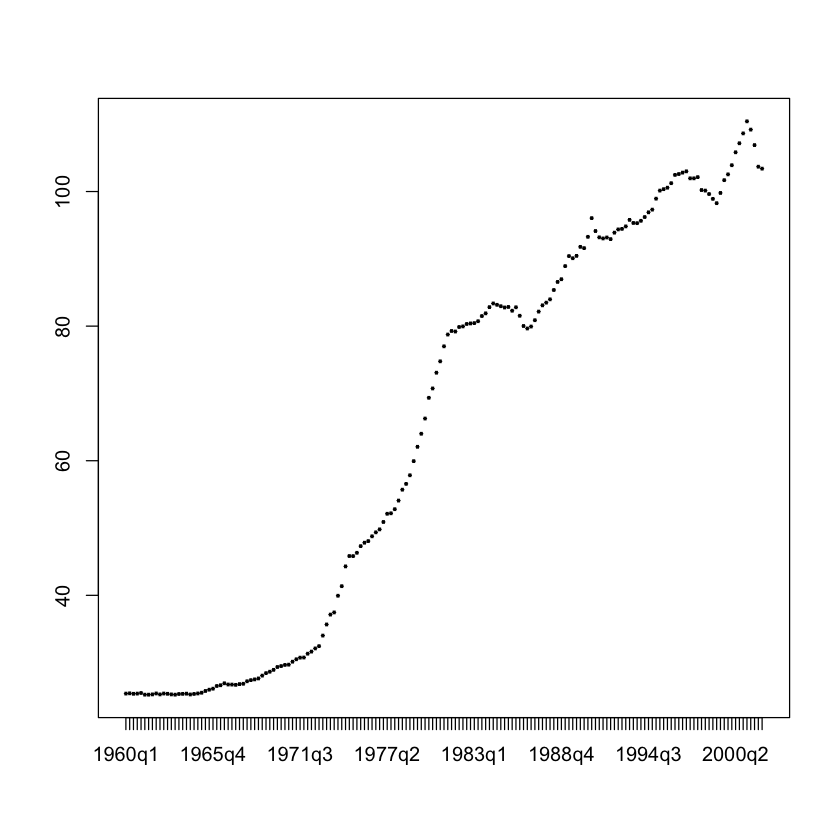

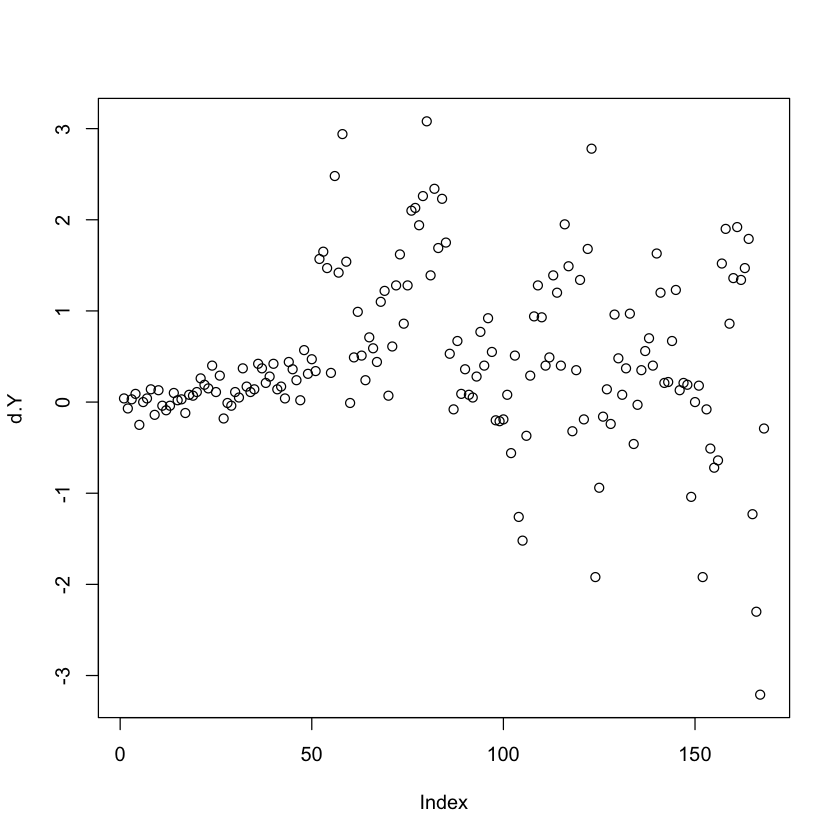

In [7]:
#PLOTTING
plot(t,Y)
plot(d.Y)



### Y seems not stationary
### D.Y - stationary but with higher variance

#Plotting ggplot2

ERROR: Error in structure(list(call = match.call(), aesthetics = aesthetics, : object 'flevels' not found


ERROR: Error: Aesthetics must either be length one, or the same length as the dataProblems:seq(1, length(mydata$d.Y.Length))


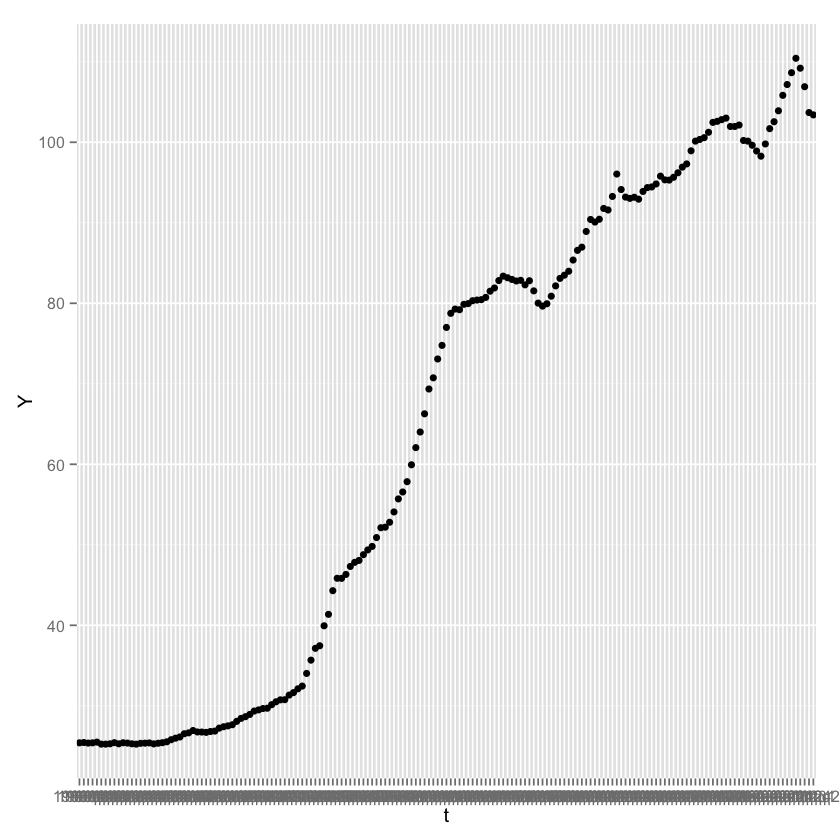

In [30]:
library(ggplot2)
p1=ggplot(mydata, aes(t, Y))+geom_point()+ scale_x_discrete(limits=flevels)
p1


x= seq(1,length(mydata$d.Y.Length))
Sepal.Length= iris$Sepal.Length

p2=ggplot(mydata, aes(d.Y,x = seq(1, length(mydata$d.Y.Length))))+geom_point()
p2



#Dickey-Fuller Test
K=number of additional lags

In [9]:
adf.test(Y, alternative="stationary", k=0)
adf.test(Y, alternative="explosive", k=0)



	Augmented Dickey-Fuller Test

data:  Y
Dickey-Fuller = -0.79306, Lag order = 0, p-value = 0.9604
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  Y
Dickey-Fuller = -0.79306, Lag order = 0, p-value = 0.03964
alternative hypothesis: explosive


#Results
Test statistic is -0.79036 <br>
p-value = 0.9604 is very large<br>
we have no stationarity 

In [10]:
summary(lm(dppi ~ lppi, na.action=na.omit))
#summary(lm(dppi ~ lppi + trend, na.action=na.omit))



Call:
lm(formula = dppi ~ lppi, na.action = na.omit)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6484 -0.4507 -0.1697  0.5135  2.6168 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.5035691  0.1682689   2.993  0.00319 **
lppi        -0.0006095  0.0023653  -0.258  0.79697   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9233 on 166 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.0003999,	Adjusted R-squared:  -0.005622 
F-statistic: 0.0664 on 1 and 166 DF,  p-value: 0.797


# Augmented Dickey-Fuller test
For Y


In [11]:
adf.test(Y, alternative="stationary")


	Augmented Dickey-Fuller Test

data:  Y
Dickey-Fuller = -1.3857, Lag order = 5, p-value = 0.8327
alternative hypothesis: stationary


#Results
p-value = 0.8327 not statianary <br>
up to 5 lags

#Dickey-Fuller and Augmnented Dickey-Fuller for d.Y

In [12]:
adf.test(d.Y, k=0)
adf.test(d.Y)

Warning message:
In adf.test(d.Y, k = 0): p-value smaller than printed p-value


	Augmented Dickey-Fuller Test

data:  d.Y
Dickey-Fuller = -6.8398, Lag order = 0, p-value = 0.01
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  d.Y
Dickey-Fuller = -3.2459, Lag order = 5, p-value = 0.08252
alternative hypothesis: stationary


# Autocorrelation function and Partial Autocorellation function ACF & PACF

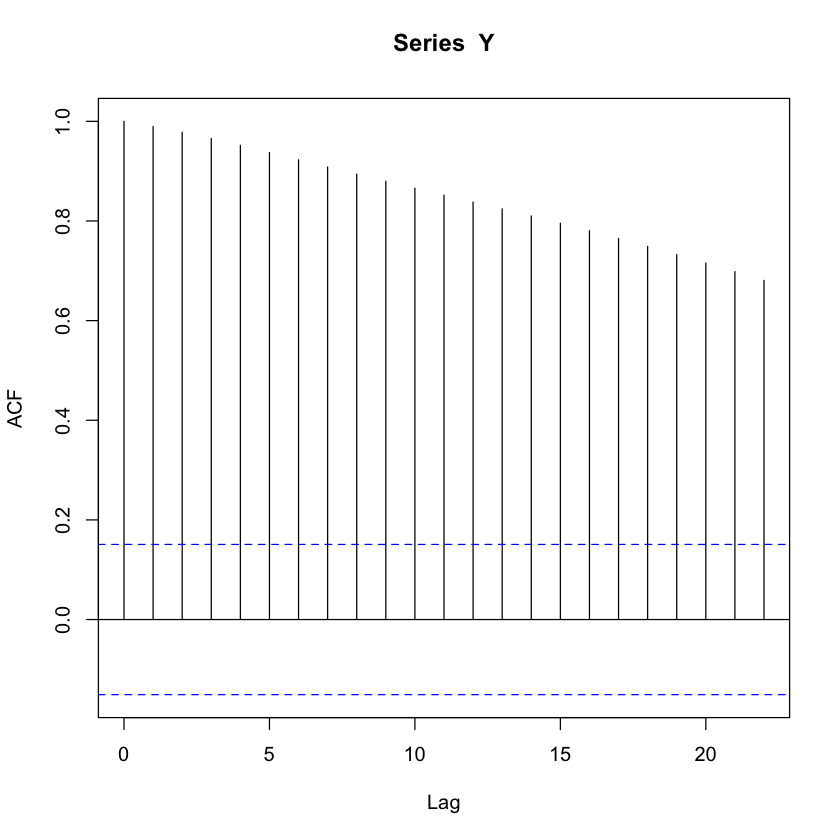

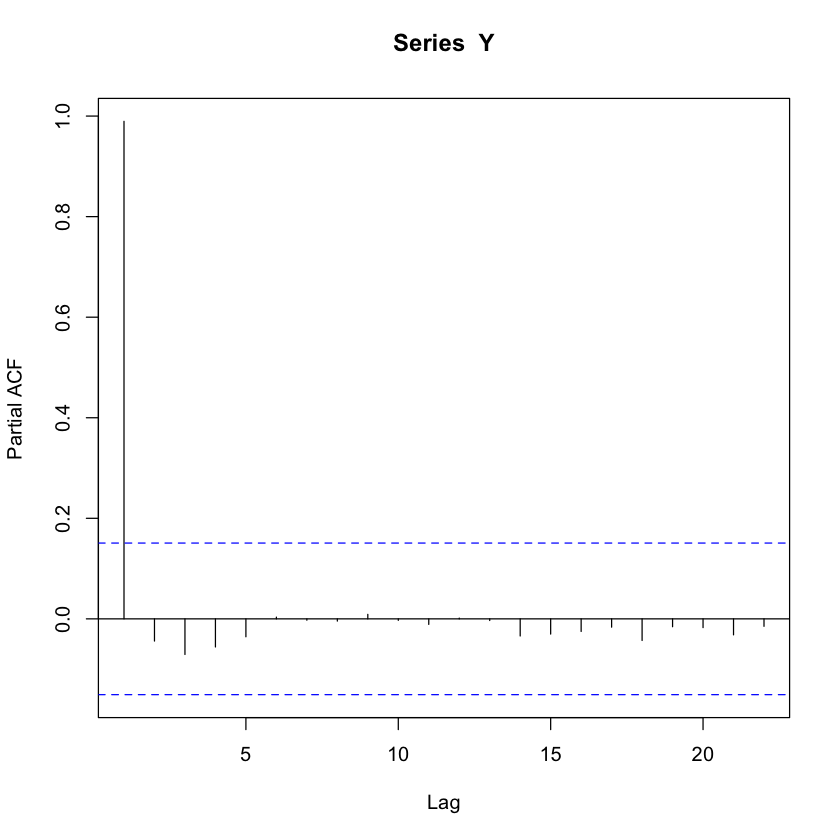

In [13]:
acf(Y)
pacf(Y)



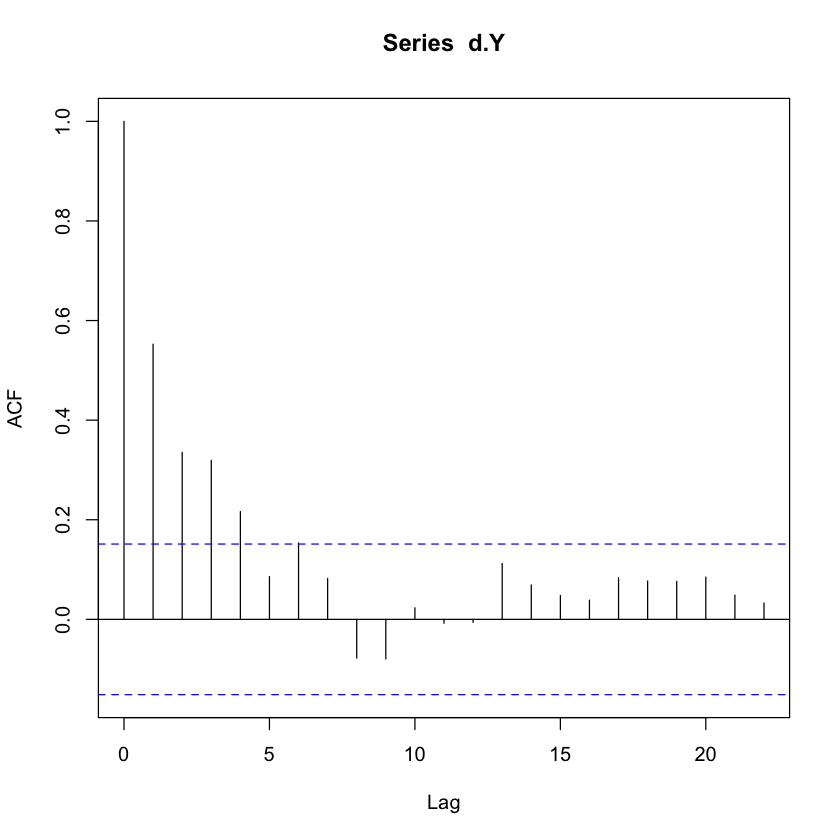

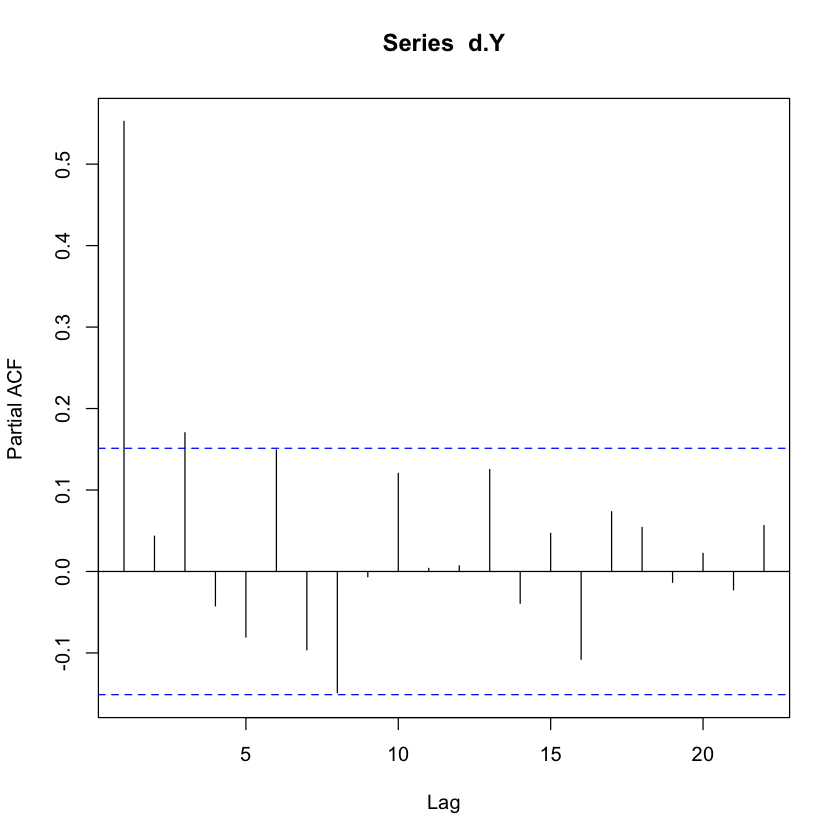

In [14]:
acf(d.Y)
pacf(d.Y)

#Estimate different ARIMA models

In [15]:
# ARIMA(1,0,0) or AR(1)
arima(Y, order = c(1,0,0))

# ARIMA(2,0,0) or AR(2)
arima(Y, order = c(2,0,0))

# ARIMA(0,0,1) or MA(1)
arima(Y, order = c(0,0,1))

# ARIMA(1,0,1) or AR(1) MA(1)
arima(Y, order = c(1,0,1))

# ARIMA on differenced variable 
# ARIMA(1,1,0)
arima(d.Y, order = c(1,0,0))

# ARIMA(0,1,1)
arima(d.Y, order = c(0,0,1))

# ARIMA(1,1,1)
arima(d.Y, order = c(1,0,1))

# ARIMA(1,1,3)
arima(d.Y, order = c(1,0,3))

# ARIMA(2,1,3)
arima(d.Y, order = c(2,0,3))



Call:
arima(x = Y, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.9996     64.522
s.e.  0.0005     38.002

sigma^2 estimated as 1.058:  log likelihood = -248.2,  aic = 502.4

Warning message:
In sqrt(diag(x$var.coef)): NaNs producedWarning message:
In sqrt(diag(x$var.coef)): NaNs produced


Call:
arima(x = Y, order = c(2, 0, 0))

Coefficients:
         ar1      ar2  intercept
      1.6474  -0.6475    230.406
s.e.  0.0003   0.0003        NaN

sigma^2 estimated as 0.6061:  log likelihood = -198.27,  aic = 404.54


Call:
arima(x = Y, order = c(0, 0, 1))

Coefficients:
         ma1  intercept
      1.0000    64.6863
s.e.  0.0182     2.3345

sigma^2 estimated as 231.6:  log likelihood = -702.48,  aic = 1410.96


Call:
arima(x = Y, order = c(1, 0, 1))

Coefficients:
         ar1     ma1  intercept
      0.9994  0.5337    64.6936
s.e.  0.0008  0.0537    37.6621

sigma^2 estimated as 0.7233:  log likelihood = -216.41,  aic = 440.82


Call:
arima(x = d.Y, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.5522     0.4557
s.e.  0.0640     0.1307

sigma^2 estimated as 0.5841:  log likelihood = -193.39,  aic = 392.79


Call:
arima(x = d.Y, order = c(0, 0, 1))

Coefficients:
         ma1  intercept
      0.4872     0.4654
s.e.  0.0579     0.0908

sigma^2 estimated as 0.6284:  log likelihood = -199.5,  aic = 404.99


Call:
arima(x = d.Y, order = c(1, 0, 1))

Coefficients:
         ar1      ma1  intercept
      0.7245  -0.2547     0.4397
s.e.  0.1152   0.1682     0.1576

sigma^2 estimated as 0.5783:  log likelihood = -192.59,  aic = 393.17


Call:
arima(x = d.Y, order = c(1, 0, 3))

Coefficients:
         ar1     ma1      ma2     ma3  intercept
      0.7334  -0.241  -0.1082  0.1217     0.4324
s.e.  0.1242   0.142   0.0970  0.0800     0.1664

sigma^2 estimated as 0.5638:  log likelihood = -190.48,  aic = 392.97


Call:
arima(x = d.Y, order = c(2, 0, 3))

Coefficients:
         ar1      ar2      ma1     ma2     ma3  intercept
      1.5192  -0.7085  -1.0503  0.2100  0.3179     0.4406
s.e.  0.2258   0.1591   0.2107  0.1314  0.1036     0.1438

sigma^2 estimated as 0.5474:  log likelihood = -188.22,  aic = 390.44

#Forecasting

## ARIMA(1,0,1) forecasting

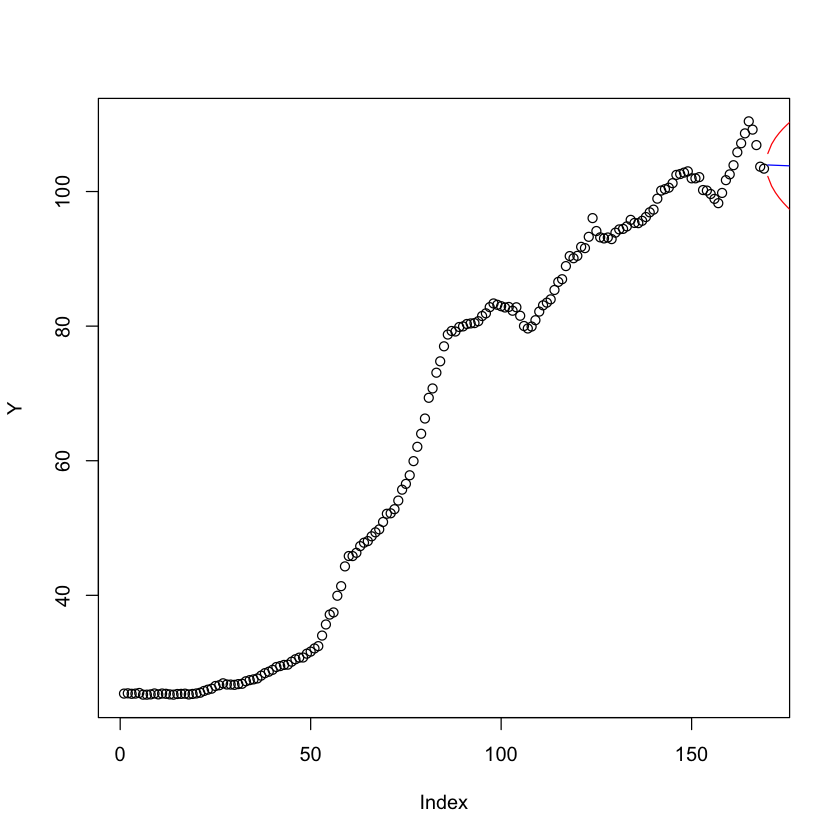

In [16]:
mydata.arima101 <- arima(Y, order = c(1,0,1))
mydata.pred1 <- predict(mydata.arima101, n.ahead=100)
plot (Y)
lines(mydata.pred1$pred, col="blue")
lines(mydata.pred1$pred+2*mydata.pred1$se, col="red")
lines(mydata.pred1$pred-2*mydata.pred1$se, col="red")

#See forecast and forecast interval

### ARIMA(1,1,1) forecasting for d.Y

ERROR: Error in xy.coords(x, y, xlabel, ylabel, log): 'x' is a list, but does not have components 'x' and 'y'


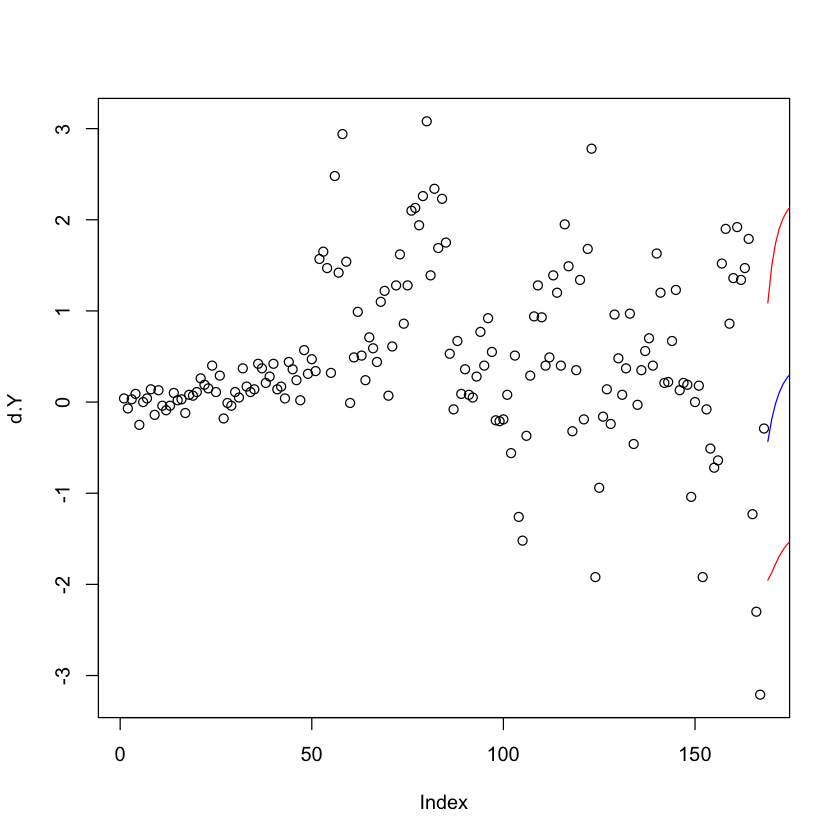

In [18]:
# ARIMA(1,1,1) forecasting
mydata.arima111 <- arima(d.Y, order = c(1,0,1))
mydata.pred1 <- predict(mydata.arima111, n.ahead=100)
plot (d.Y)

lines(mydata.pred1$pred, col="blue")
lines(mydata.pred1$pred+2*mydata.pred1$se, col="red")
lines(mydata.pred1$pred-2*mydata.pred1$se, col="red")


#Subplotting


In [24]:
plot(mydata.arima111,type="l" )

ERROR: Error in xy.coords(x, y, xlabel, ylabel, log): 'x' is a list, but does not have components 'x' and 'y'


ERROR: Error in eval(expr, envir, enclos): could not find function "Arima"


Warning message:
In min(x): no non-missing arguments to min; returning InfWarning message:
In max(x): no non-missing arguments to max; returning -InfWarning message:
In min(x): no non-missing arguments to min; returning InfWarning message:
In max(x): no non-missing arguments to max; returning -Inf

ERROR: Error in plot.window(...): need finite 'xlim' values


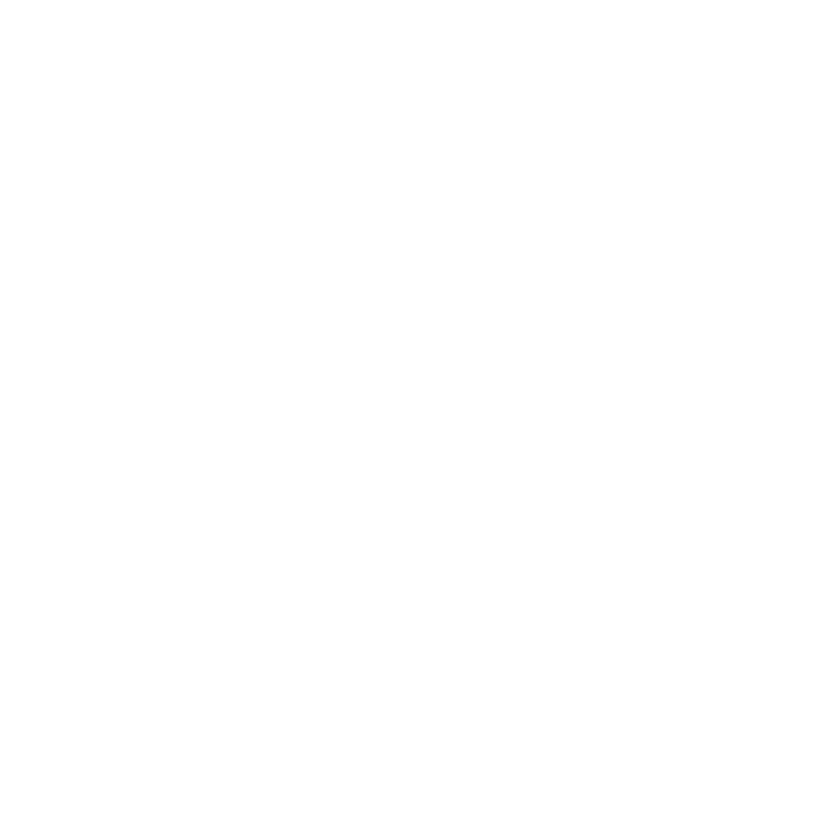

In [29]:
fit=Arima(d.Y, order = c(1,0,1))
plot(fit$x,col="red")
lines(fitted(fit),col="blue")
